
# Importação de bibliotecas

In [81]:
import pandas as pd
import numpy as np
from classifiers.naive_bayes_classifier import NaiveBayesClassifier
from utils.synthetic_data_generator import SyntheticDatasetGenerator
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

In [82]:
np.random.seed(42)
CLASSIFIER_NAME = "Naive Bayes Classifier"
TARGET_COLUMN_NAME = "y"
DATASET_NAME = "Synthetic"
TEST_SIZE = 0.3
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

In [83]:
features_patterns = {
    "pattern_1": {"pattern": np.array([[2, 2]]), "num_samples": 40, "y": 0},
    "pattern_2": {"pattern": np.array([[1, 3]]), "num_samples": 40, "y": 1},
    "pattern_3": {"pattern": np.array([[3, 3]]), "num_samples": 40, "y": 2},
}

generator = SyntheticDatasetGenerator()
synthetic_df = generator.generate_data(features_patterns)

In [84]:
synthetic_df

,x0,x1,y
0,2.071612,2.278034,0
1,2.173777,1.776872,0
2,2.037052,2.028689,0
3,2.014708,1.961707,0
4,2.068603,1.825539,0
...,...,...,...
115,2.707758,2.932898,2
116,2.763537,2.794310,2
117,2.723121,2.767191,2
118,3.158370,3.031695,2


In [85]:
list(synthetic_df[TARGET_COLUMN_NAME].unique())

[np.int64(0), np.int64(1), np.int64(2)]

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Bayesiano

In [86]:
naive_bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=synthetic_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

bayesian_accuracy_list = []

for train_indexes, test_indexes in naive_bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=synthetic_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = NaiveBayesClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_df_results = pd.DataFrame(
    bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,1.0,0.0,"[118, 24, 8, 29, 44, 78, 34, 23, 6, 80, 66, 98, 25, 90, 46, 50, 115, 114, 33, 17, 107, 13, 100, 15, 2, 49, 110, 88, 0, 3, 103, 113, 106, 91, 92, 14, 82, 22, 32, 74, 52, 116, 18, 95, 117, 86, 4, 40, 81, 68, 47, 39, 101, 43, 67, 20, 36, 83, 21, 65, 28, 69, 54, 16, 60, 79, 63, 5, 119, 31, 109, 53, 76, 30, 112, 12, 7, 108, 59, 42, 87, 97, 72, 10]","[1, 9, 11, 19, 26, 27, 35, 37, 38, 41, 45, 48, 51, 55, 56, 57, 58, 61, 62, 64, 70, 71, 73, 75, 77, 84, 85, 89, 93, 94, 96, 99, 102, 104, 105, 111]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[9, 0, 0], [0, 16, 0], [0, 0, 11]]"
1,1.0,0.0,"[78, 33, 56, 30, 10, 28, 4, 60, 79, 0, 43, 58, 98, 71, 24, 92, 25, 22, 48, 17, 40, 49, 75, 109, 64, 83, 72, 57, 62, 111, 105, 14, 76, 11, 3, 51, 1, 114, 35, 100, 6, 102, 52, 42, 97, 8, 113, 47, 89, 26, 12, 53, 81, 16, 90, 27, 54, 95, 112, 115, 5, 69, 116, 104, 94, 34, 82, 32, 29, 73, 23, 66, 85, 19, 117, 15, 63, 67, 107, 55, 2, 41, 86, 39]","[7, 9, 13, 18, 20, 21, 31, 36, 37, 38, 44, 45, 46, 50, 59, 61, 65, 68, 70, 74, 77, 80, 84, 87, 88, 91, 93, 96, 99, 101, 103, 106, 108, 110, 118, 119]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[10, 0, 0], [0, 11, 0], [0, 0, 15]]"
2,1.0,0.0,"[83, 8, 68, 76, 88, 49, 5, 14, 118, 7, 87, 28, 46, 11, 4, 94, 79, 103, 57, 102, 50, 85, 113, 111, 72, 60, 65, 105, 1, 108, 78, 67, 55, 75, 59, 89, 56, 117, 19, 51, 31, 42, 54, 21, 39, 22, 34, 26, 30, 47, 23, 24, 91, 71, 82, 44, 40, 107, 114, 52, 74, 13, 62, 58, 45, 41, 15, 116, 101, 66, 61, 98, 18, 25, 37, 80, 35, 99, 20, 3, 29, 12, 10, 115]","[0, 2, 6, 9, 16, 17, 27, 32, 33, 36, 38, 43, 48, 53, 63, 64, 69, 70, 73, 77, 81, 84, 86, 90, 92, 93, 95, 96, 97, 100, 104, 106, 109, 110, 112, 119]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[11, 0, 0], [0, 9, 0], [0, 0, 16]]"
3,1.0,0.0,"[34, 49, 66, 70, 64, 37, 81, 114, 11, 99, 77, 103, 71, 20, 52, 12, 83, 1, 113, 67, 95, 19, 31, 74, 51, 22, 91, 39, 118, 72, 104, 119, 94, 41, 10, 115, 63, 92, 96, 97, 6, 21, 27, 90, 24, 8, 38, 69, 5, 33, 116, 61, 0, 42, 47, 46, 108, 101, 59, 110, 109, 88, 35, 53, 106, 48, 17, 62, 50, 45, 56, 9, 93, 75, 30, 111, 14, 76, 107, 40, 60, 7, 54, 55]","[2, 3, 4, 13, 15, 16, 18, 23, 25, 26, 28, 29, 32, 36, 43, 44, 57, 58, 65, 68, 73, 78, 79, 80, 82, 84, 85, 86, 87, 89, 98, 100, 102, 105, 112, 117]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[14, 0, 0], [0, 9, 0], [0, 0, 13]]"
4,1.0,0.0,"[26, 36, 53, 1, 19, 4, 30, 57, 25, 16, 58, 41, 74, 48, 94, 0, 35, 100, 92, 69, 14, 113, 52, 40, 27, 64, 72, 71, 13, 2, 73, 10, 117, 81, 22, 83, 46, 87, 109, 104, 66, 112, 63, 62, 42, 6, 65, 111, 103, 15, 105, 56, 59, 90, 32, 11, 34, 60, 50, 17, 38, 76, 18, 85, 55, 5, 43, 115, 7, 116, 89, 110, 88, 93, 47, 51, 101, 37, 119, 96, 44, 95, 108, 29]","[3, 8, 9, 12, 20, 21, 23, 24, 28, 31, 33, 39, 45, 49, 54, 61, 67, 68, 70, 75, 77, 78, 79, 80, 82, 84, 86, 91, 97, 98, 99, 102, 106, 107, 114, 118]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[12, 0, 0], [0, 11, 0], [0, 0, 13]]"
...,...,...,...,...,...,...
195,1.0,0.0,"[119, 1, 81, 83, 26, 17, 112, 103, 24, 9, 82, 88, 106, 4, 93, 91, 0, 100, 114, 76, 46, 32, 18, 107, 58, 27, 48, 8, 65, 108, 3, 43, 34, 89, 16, 61, 7, 70, 72, 31, 19, 111, 77, 37, 42, 15, 110, 73, 78, 118, 10, 116, 115, 56, 95, 104, 117, 59, 74, 80, 109, 40, 85, 63, 54, 44, 102, 67, 28, 105, 92, 60, 21, 36, 52, 5, 62, 94, 12, 51, 87, 75, 98, 113]","[2, 6, 11, 13, 14, 20, 22, 23, 25, 29, 30, 33, 35, 38, 39, 41, 45, 47, 49, 50, 53, 55, 57, 64, 66, 68, 69, 71, 79, 84, 86, 90, 96, 97, 99, 101]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]","[[1

# Vetor de acurácias

In [87]:
bayesian_accuracy_vector = pd.Series(bayesian_df_results["accuracy"])

In [88]:
bayesian_accuracy_vector

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [89]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Bayesiano

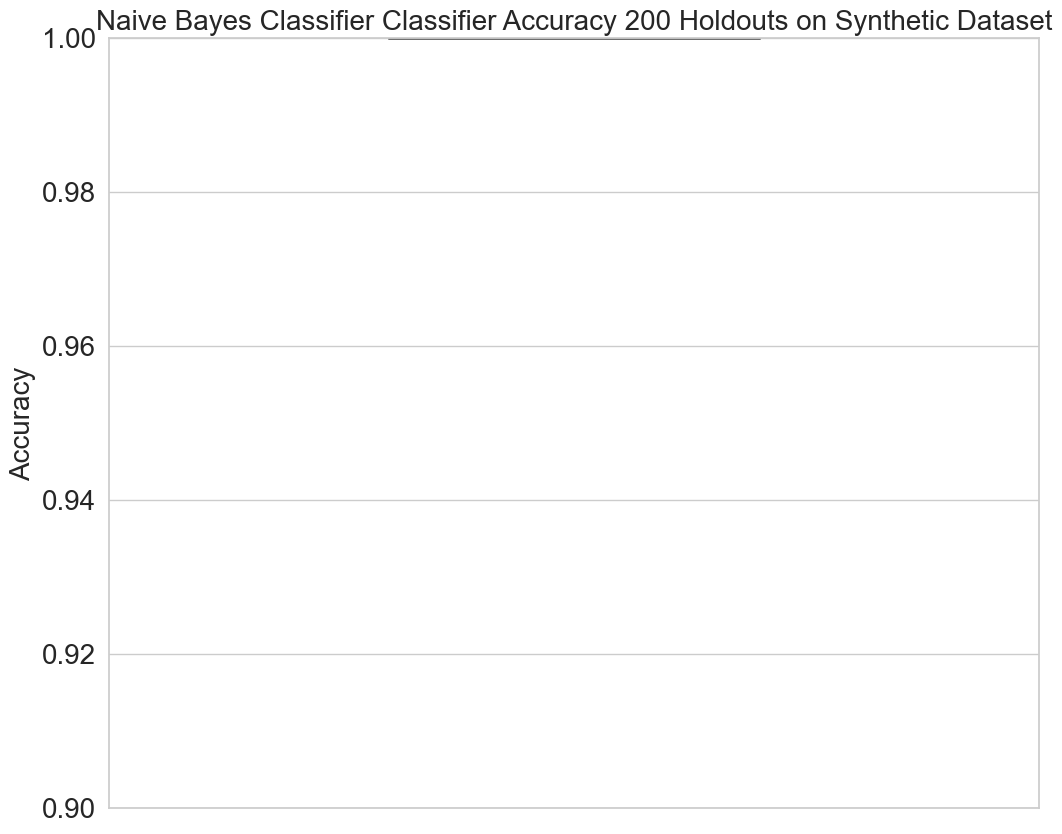

In [90]:
image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_3/synthetic_bayesian_accuracy_boxplot.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [91]:
max_accuracy = bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_df_results[
    bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=synthetic_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índice selecionado aleatoriamente: 112
Acurácia do índice selecionado: 100.00%

# Resgatando a matriz de confusão e plotando ela

In [92]:
confusion_matrix_result = bayesian_df_results.loc[index_selected, "confusion_matrix"]

In [93]:
confusion_matrix_result

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 14]])

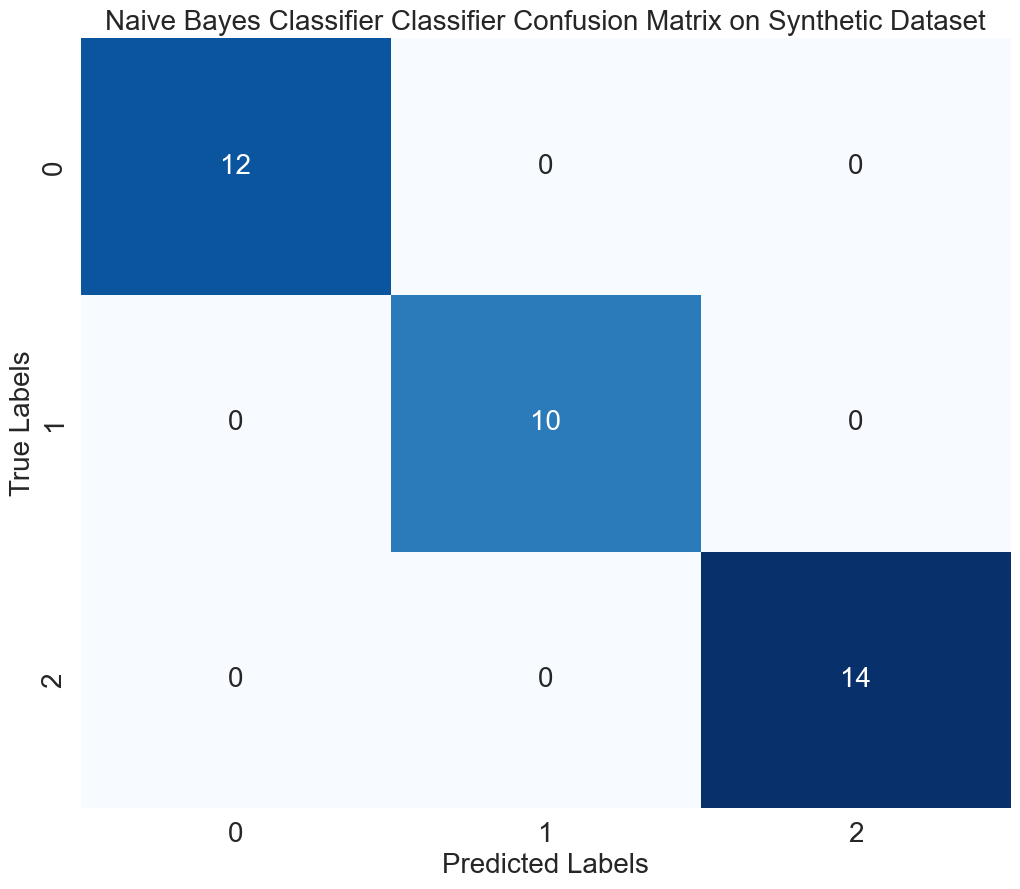

In [94]:
image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_3/synthetic_bayesian_confusion_matrix.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Bayesiano baseado em duas features

In [95]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = NaiveBayesClassifier()
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

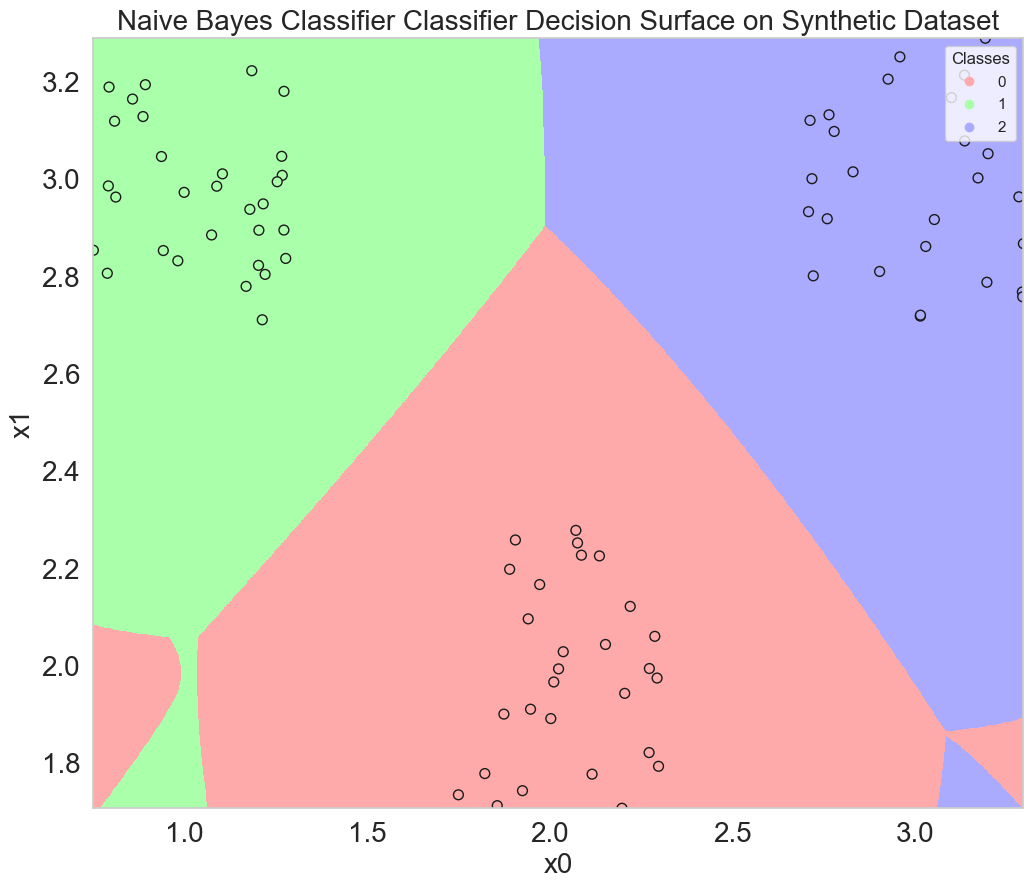

In [96]:
image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save="../../data/images/atividade_3/synthetic_bayesian_decision_surface.jpeg",
    show=True,
)